Data from Moon file

/Users/dosya/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


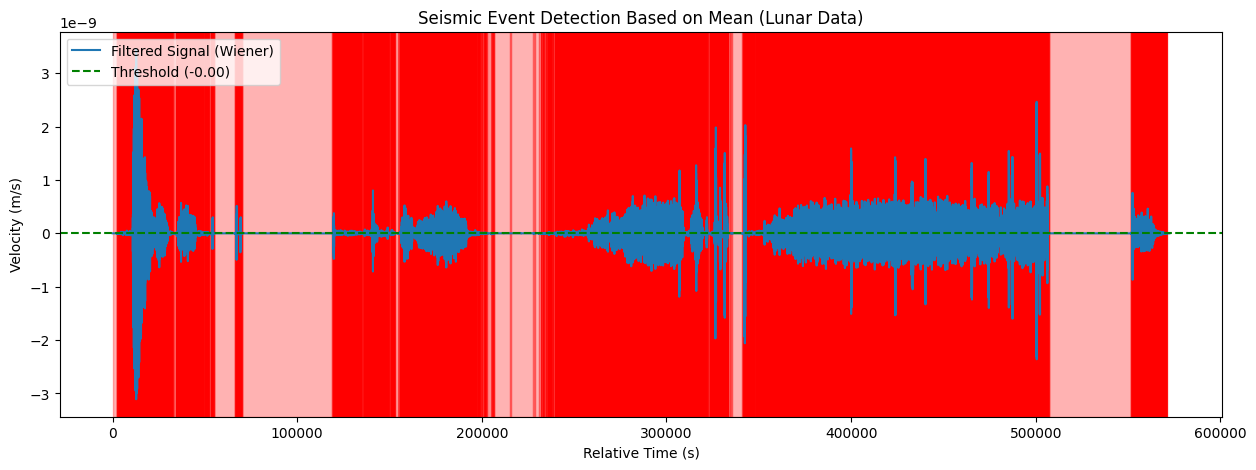

32355 seismic events detected.
Event 1: Start - 0, End - 2146, Duration - 323.92 seconds
Event 2: Start - 2167, End - 2220, Duration - 8.00 seconds
Event 3: Start - 2227, End - 2510, Duration - 42.72 seconds
Event 4: Start - 2519, End - 2556, Duration - 5.58 seconds
Event 5: Start - 2573, End - 2575, Duration - 0.30 seconds
Event 6: Start - 2587, End - 2633, Duration - 6.94 seconds
Event 7: Start - 2637, End - 2734, Duration - 14.64 seconds
Event 8: Start - 2736, End - 2743, Duration - 1.06 seconds
Event 9: Start - 2744, End - 2792, Duration - 7.25 seconds
Event 10: Start - 2793, End - 2800, Duration - 1.06 seconds
Event 11: Start - 2805, End - 2807, Duration - 0.30 seconds
Event 12: Start - 2887, End - 2924, Duration - 5.58 seconds
Event 13: Start - 2965, End - 3196, Duration - 34.87 seconds
Event 14: Start - 3226, End - 3283, Duration - 8.60 seconds
Event 15: Start - 3297, End - 3354, Duration - 8.60 seconds
Event 16: Start - 3369, End - 3397, Duration - 4.23 seconds
Event 17: Start 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import wiener

# Load the CSV data
file_path = './data/lunar/test/data/S12_GradeB/xa.s12.00.mhz.1969-12-16HR00_evid00006.csv'
data = pd.read_csv(file_path)

# Extracting the 'velocity(m/s)' as the signal and 'time_rel(sec)' for event durations
signal = data['velocity(m/s)'].values
time_rel = data['time_rel(sec)'].values

# Apply Wiener filter to the signal for noise removal
filtered_signal_wiener = wiener(signal, mysize=29)

# Calculate the mean value of the signal and define the threshold
signal_mean = np.mean(filtered_signal_wiener)
threshold = signal_mean * 2  # Threshold is set to 2 times the mean value

# Function to detect events based on threshold and calculate duration
def detect_events(signal, threshold, time_rel):
    events = []
    in_event = False
    start_idx = 0
    
    for i in range(len(signal)):
        if signal[i] > threshold and not in_event:
            # Start of the event
            in_event = True
            start_idx = i
        elif signal[i] <= threshold and in_event:
            # End of the event
            in_event = False
            end_idx = i
            # Calculate the duration in seconds
            start_time = time_rel[start_idx]
            end_time = time_rel[end_idx]
            duration = end_time - start_time
            events.append((start_idx, end_idx, duration))
    
    return events

# Detect events using the filtered signal and threshold
events = detect_events(filtered_signal_wiener, threshold, time_rel)

# Visualization of the detected events
plt.figure(figsize=(15, 5))
times = np.arange(len(signal))
plt.plot(times, filtered_signal_wiener, label='Filtered Signal (Wiener)')
plt.axhline(y=threshold, color='green', linestyle='--', label=f'Threshold ({threshold:.2f})')

# Highlight detected events on the plot
for start_idx, end_idx, duration in events:
    plt.axvspan(start_idx, end_idx, color='red', alpha=0.3)

plt.title("Seismic Event Detection Based on Mean (Lunar Data)")
plt.xlabel("Relative Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.show()

# Output results
print(f"{len(events)} seismic events detected.")
for i, (start_idx, end_idx, duration) in enumerate(events):
    print(f"Event {i+1}: Start - {start_idx}, End - {end_idx}, Duration - {duration:.2f} seconds")

Data from Mars file

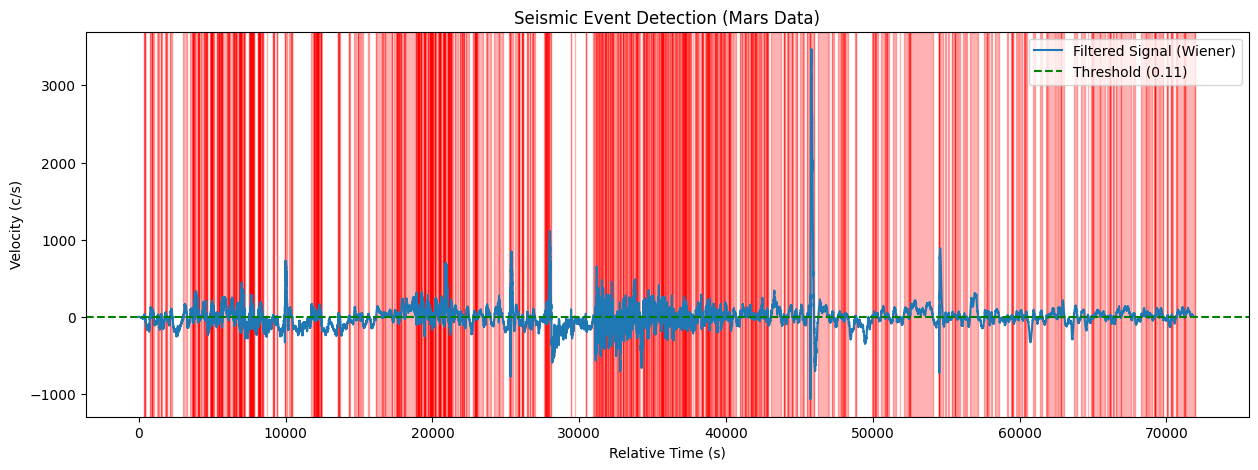

1049 seismic events detected.
Event 1: Start - 320, End - 325, Duration - 0.25 seconds
Event 2: Start - 327, End - 409, Duration - 4.10 seconds
Event 3: Start - 412, End - 413, Duration - 0.05 seconds
Event 4: Start - 417, End - 419, Duration - 0.10 seconds
Event 5: Start - 420, End - 421, Duration - 0.05 seconds
Event 6: Start - 750, End - 751, Duration - 0.05 seconds
Event 7: Start - 752, End - 865, Duration - 5.65 seconds
Event 8: Start - 866, End - 874, Duration - 0.40 seconds
Event 9: Start - 876, End - 878, Duration - 0.10 seconds
Event 10: Start - 879, End - 883, Duration - 0.20 seconds
Event 11: Start - 885, End - 1024, Duration - 6.95 seconds
Event 12: Start - 1261, End - 1264, Duration - 0.15 seconds
Event 13: Start - 1274, End - 1275, Duration - 0.05 seconds
Event 14: Start - 1277, End - 1345, Duration - 3.40 seconds
Event 15: Start - 1489, End - 1490, Duration - 0.05 seconds
Event 16: Start - 1492, End - 1499, Duration - 0.35 seconds
Event 17: Start - 1500, End - 1562, Dura

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import wiener

# Load the CSV data
file_path = './data/mars/test/data/XB.ELYSE.02.BHV.2019-05-23HR02_evid0041.csv'
data = pd.read_csv(file_path)

# Extract the 'velocity(c/s)' as the signal and 'time_rel(sec)' for event durations
signal = data['velocity(c/s)'].values
time_rel = data['rel_time(sec)'].values

# Apply Wiener filter to the signal for noise removal
filtered_signal_wiener = wiener(signal, mysize=29)

# Calculate the mean value of the signal and define the threshold
signal_mean = np.mean(filtered_signal_wiener)
threshold = signal_mean * 2  # Threshold is set to 2 times the mean value

# Function to detect events based on threshold and calculate duration
def detect_events(signal, threshold, time_rel):
    events = []
    in_event = False
    start_idx = 0
    
    for i in range(len(signal)):
        if signal[i] > threshold and not in_event:
            # Start of the event
            in_event = True
            start_idx = i
        elif signal[i] <= threshold and in_event:
            # End of the event
            in_event = False
            end_idx = i
            # Calculate the duration in seconds
            start_time = time_rel[start_idx]
            end_time = time_rel[end_idx]
            duration = end_time - start_time
            events.append((start_idx, end_idx, duration))
    
    return events

# Detect events using the filtered signal and threshold
events = detect_events(filtered_signal_wiener, threshold, time_rel)

# Visualization of the detected events
plt.figure(figsize=(15, 5))
times = np.arange(len(signal))
plt.plot(times, filtered_signal_wiener, label='Filtered Signal (Wiener)')
plt.axhline(y=threshold, color='green', linestyle='--', label=f'Threshold ({threshold:.2f})')

# Highlight detected events on the plot
for start_idx, end_idx, duration in events:
    plt.axvspan(start_idx, end_idx, color='red', alpha=0.3)

plt.title("Seismic Event Detection (Mars Data)")
plt.xlabel("Relative Time (s)")
plt.ylabel("Velocity (c/s)")
plt.legend()
plt.show()

# Output results
print(f"{len(events)} seismic events detected.")
for i, (start_idx, end_idx, duration) in enumerate(events):
    print(f"Event {i+1}: Start - {start_idx}, End - {end_idx}, Duration - {duration:.2f} seconds")

Data from Mars directory

Processing file: ./data/mars/test/data/XB.ELYSE.02.BHV.2019-05-23HR02_evid0041.csv


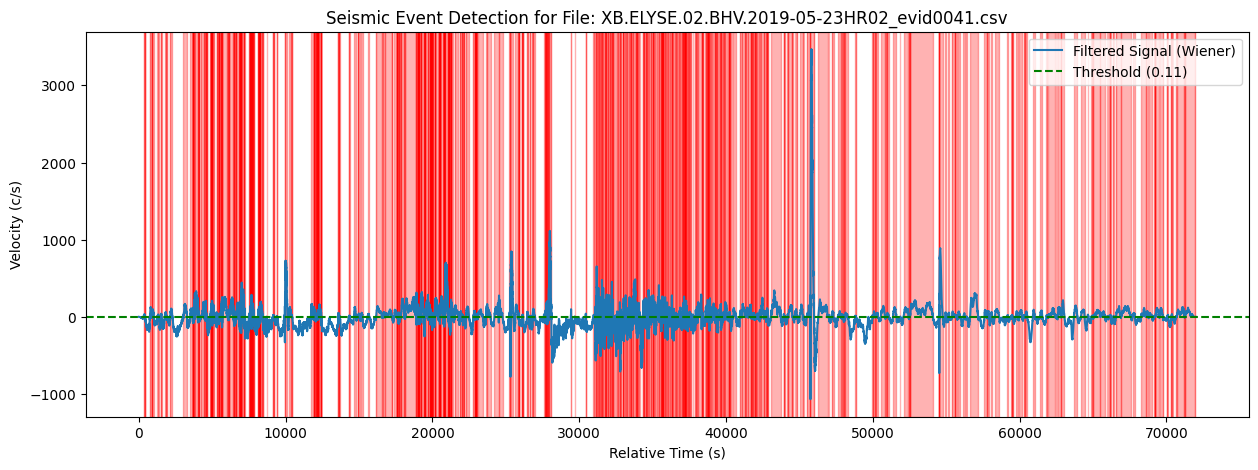

1049 seismic events detected in file ./data/mars/test/data/XB.ELYSE.02.BHV.2019-05-23HR02_evid0041.csv.
Event 1: Start - 320, End - 325, Duration - 0.25 seconds
Event 2: Start - 327, End - 409, Duration - 4.10 seconds
Event 3: Start - 412, End - 413, Duration - 0.05 seconds
Event 4: Start - 417, End - 419, Duration - 0.10 seconds
Event 5: Start - 420, End - 421, Duration - 0.05 seconds
Event 6: Start - 750, End - 751, Duration - 0.05 seconds
Event 7: Start - 752, End - 865, Duration - 5.65 seconds
Event 8: Start - 866, End - 874, Duration - 0.40 seconds
Event 9: Start - 876, End - 878, Duration - 0.10 seconds
Event 10: Start - 879, End - 883, Duration - 0.20 seconds
Event 11: Start - 885, End - 1024, Duration - 6.95 seconds
Event 12: Start - 1261, End - 1264, Duration - 0.15 seconds
Event 13: Start - 1274, End - 1275, Duration - 0.05 seconds
Event 14: Start - 1277, End - 1345, Duration - 3.40 seconds
Event 15: Start - 1489, End - 1490, Duration - 0.05 seconds
Event 16: Start - 1492, En

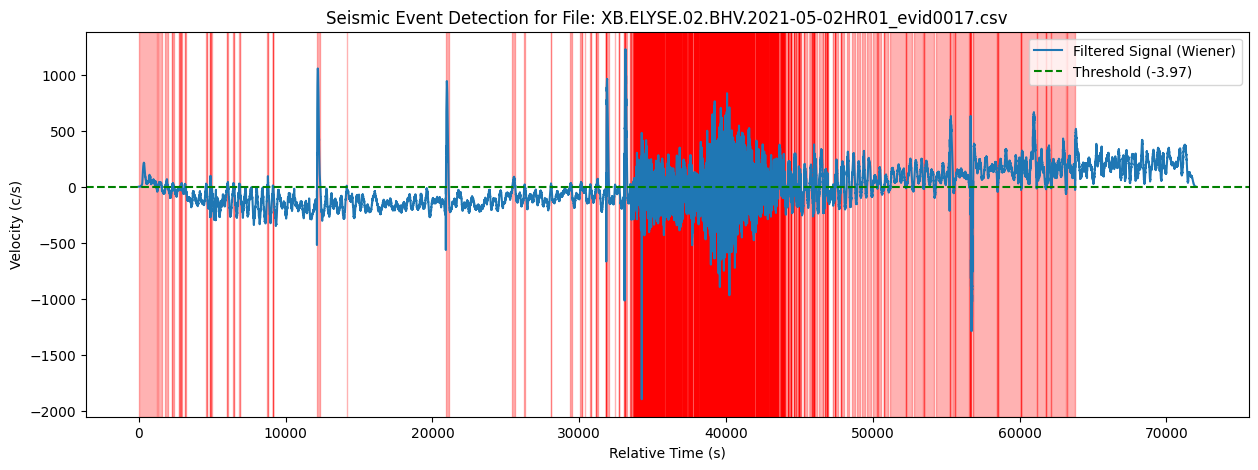

2209 seismic events detected in file ./data/mars/test/data/XB.ELYSE.02.BHV.2021-05-02HR01_evid0017.csv.
Event 1: Start - 0, End - 1204, Duration - 60.20 seconds
Event 2: Start - 1302, End - 1550, Duration - 12.40 seconds
Event 3: Start - 1812, End - 1967, Duration - 7.75 seconds
Event 4: Start - 2264, End - 2266, Duration - 0.10 seconds
Event 5: Start - 2267, End - 2368, Duration - 5.05 seconds
Event 6: Start - 2722, End - 2723, Duration - 0.05 seconds
Event 7: Start - 2724, End - 2725, Duration - 0.05 seconds
Event 8: Start - 2821, End - 2827, Duration - 0.30 seconds
Event 9: Start - 2832, End - 2850, Duration - 0.90 seconds
Event 10: Start - 2854, End - 2948, Duration - 4.70 seconds
Event 11: Start - 3118, End - 3174, Duration - 2.80 seconds
Event 12: Start - 3176, End - 3182, Duration - 0.30 seconds
Event 13: Start - 4556, End - 4610, Duration - 2.70 seconds
Event 14: Start - 4617, End - 4626, Duration - 0.45 seconds
Event 15: Start - 4852, End - 4853, Duration - 0.05 seconds
Event 

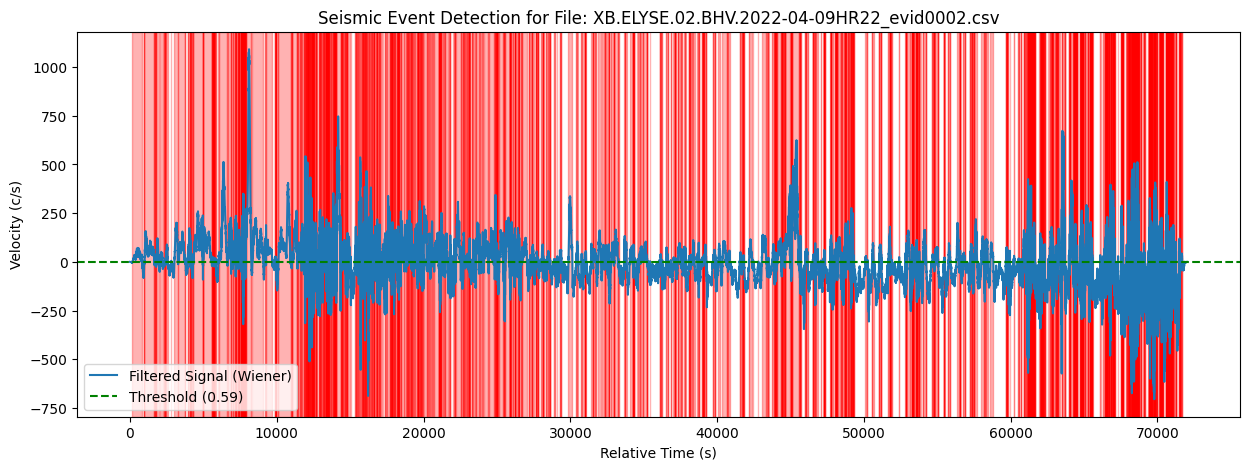

2210 seismic events detected in file ./data/mars/test/data/XB.ELYSE.02.BHV.2022-04-09HR22_evid0002.csv.
Event 1: Start - 165, End - 822, Duration - 32.85 seconds
Event 2: Start - 974, End - 975, Duration - 0.05 seconds
Event 3: Start - 980, End - 981, Duration - 0.05 seconds
Event 4: Start - 983, End - 984, Duration - 0.05 seconds
Event 5: Start - 985, End - 1658, Duration - 33.65 seconds
Event 6: Start - 1661, End - 1663, Duration - 0.10 seconds
Event 7: Start - 1669, End - 1671, Duration - 0.10 seconds
Event 8: Start - 1688, End - 1689, Duration - 0.05 seconds
Event 9: Start - 1691, End - 1695, Duration - 0.20 seconds
Event 10: Start - 1697, End - 1756, Duration - 2.95 seconds
Event 11: Start - 1761, End - 1764, Duration - 0.15 seconds
Event 12: Start - 1766, End - 1770, Duration - 0.20 seconds
Event 13: Start - 1802, End - 1958, Duration - 7.80 seconds
Event 14: Start - 2066, End - 2216, Duration - 7.50 seconds
Event 15: Start - 2290, End - 2291, Duration - 0.05 seconds
Event 16: St

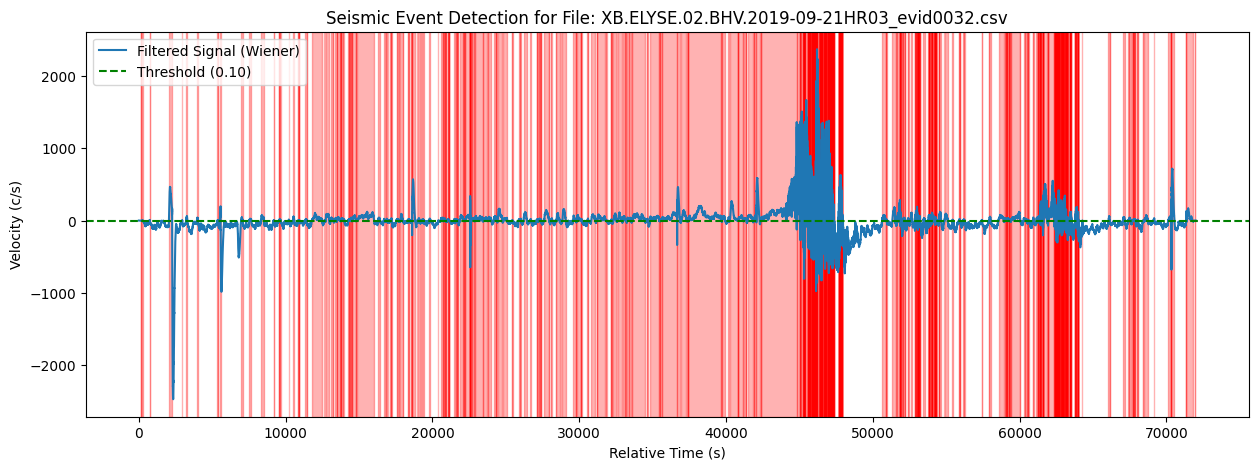

946 seismic events detected in file ./data/mars/test/data/XB.ELYSE.02.BHV.2019-09-21HR03_evid0032.csv.
Event 1: Start - 117, End - 119, Duration - 0.10 seconds
Event 2: Start - 134, End - 138, Duration - 0.20 seconds
Event 3: Start - 153, End - 161, Duration - 0.40 seconds
Event 4: Start - 233, End - 262, Duration - 1.45 seconds
Event 5: Start - 732, End - 733, Duration - 0.05 seconds
Event 6: Start - 734, End - 739, Duration - 0.25 seconds
Event 7: Start - 2049, End - 2266, Duration - 10.85 seconds
Event 8: Start - 2953, End - 2961, Duration - 0.40 seconds
Event 9: Start - 3214, End - 3301, Duration - 4.35 seconds
Event 10: Start - 3952, End - 4038, Duration - 4.30 seconds
Event 11: Start - 5357, End - 5360, Duration - 0.15 seconds
Event 12: Start - 5373, End - 5379, Duration - 0.30 seconds
Event 13: Start - 5511, End - 5567, Duration - 2.80 seconds
Event 14: Start - 6972, End - 7066, Duration - 4.70 seconds
Event 15: Start - 7530, End - 7660, Duration - 6.50 seconds
Event 16: Start -

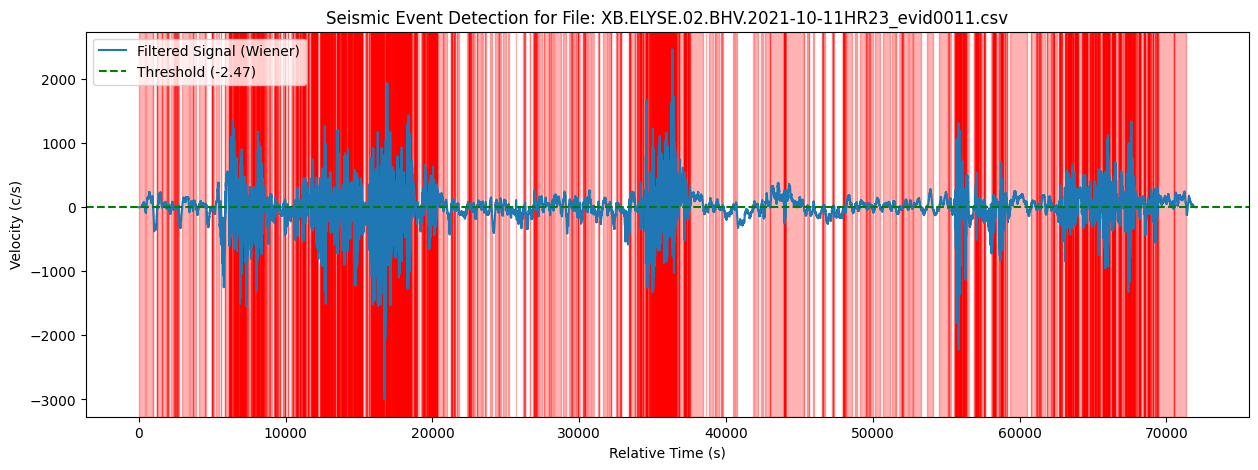

3092 seismic events detected in file ./data/mars/test/data/XB.ELYSE.02.BHV.2021-10-11HR23_evid0011.csv.
Event 1: Start - 0, End - 418, Duration - 20.90 seconds
Event 2: Start - 512, End - 971, Duration - 22.95 seconds
Event 3: Start - 975, End - 976, Duration - 0.05 seconds
Event 4: Start - 1256, End - 1257, Duration - 0.05 seconds
Event 5: Start - 1258, End - 1260, Duration - 0.10 seconds
Event 6: Start - 1264, End - 1266, Duration - 0.10 seconds
Event 7: Start - 1269, End - 1582, Duration - 15.65 seconds
Event 8: Start - 1586, End - 1587, Duration - 0.05 seconds
Event 9: Start - 1588, End - 1880, Duration - 14.60 seconds
Event 10: Start - 1930, End - 1938, Duration - 0.40 seconds
Event 11: Start - 1940, End - 1944, Duration - 0.20 seconds
Event 12: Start - 1945, End - 1964, Duration - 0.95 seconds
Event 13: Start - 1966, End - 1969, Duration - 0.15 seconds
Event 14: Start - 1971, End - 2057, Duration - 4.30 seconds
Event 15: Start - 2223, End - 2343, Duration - 6.00 seconds
Event 16:

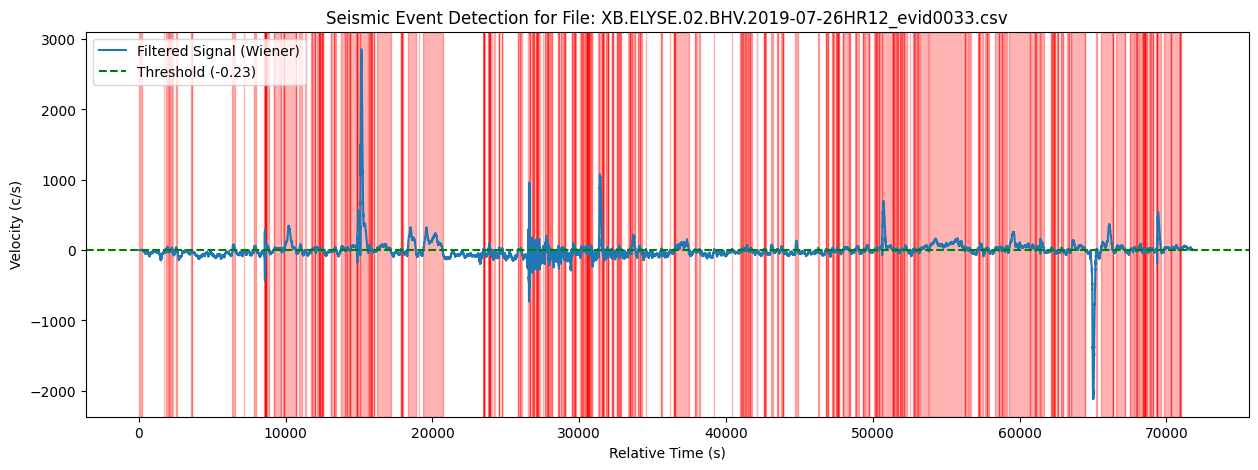

472 seismic events detected in file ./data/mars/test/data/XB.ELYSE.02.BHV.2019-07-26HR12_evid0033.csv.
Event 1: Start - 0, End - 208, Duration - 10.40 seconds
Event 2: Start - 1738, End - 1746, Duration - 0.40 seconds
Event 3: Start - 1860, End - 1988, Duration - 6.40 seconds
Event 4: Start - 2081, End - 2085, Duration - 0.20 seconds
Event 5: Start - 2086, End - 2087, Duration - 0.05 seconds
Event 6: Start - 2197, End - 2289, Duration - 4.60 seconds
Event 7: Start - 2314, End - 2315, Duration - 0.05 seconds
Event 8: Start - 2499, End - 2588, Duration - 4.45 seconds
Event 9: Start - 3580, End - 3588, Duration - 0.40 seconds
Event 10: Start - 3604, End - 3605, Duration - 0.05 seconds
Event 11: Start - 6376, End - 6567, Duration - 9.55 seconds
Event 12: Start - 7141, End - 7149, Duration - 0.40 seconds
Event 13: Start - 7836, End - 8010, Duration - 8.70 seconds
Event 14: Start - 8573, End - 8574, Duration - 0.05 seconds
Event 15: Start - 8582, End - 8583, Duration - 0.05 seconds
Event 16:

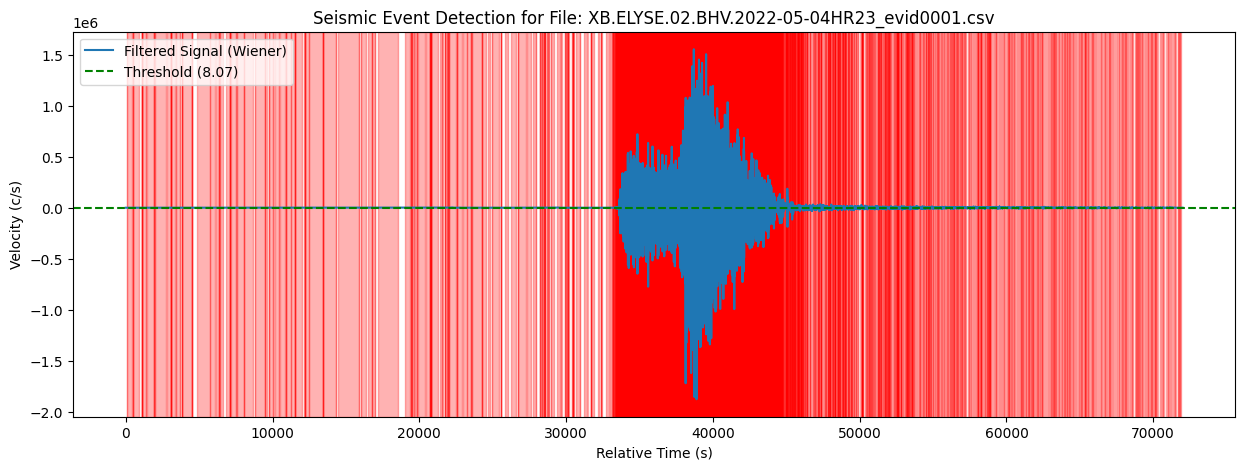

3495 seismic events detected in file ./data/mars/test/data/XB.ELYSE.02.BHV.2022-05-04HR23_evid0001.csv.
Event 1: Start - 107, End - 109, Duration - 0.10 seconds
Event 2: Start - 111, End - 442, Duration - 16.55 seconds
Event 3: Start - 509, End - 511, Duration - 0.10 seconds
Event 4: Start - 512, End - 513, Duration - 0.05 seconds
Event 5: Start - 514, End - 517, Duration - 0.15 seconds
Event 6: Start - 518, End - 932, Duration - 20.70 seconds
Event 7: Start - 1115, End - 1116, Duration - 0.05 seconds
Event 8: Start - 1117, End - 1119, Duration - 0.10 seconds
Event 9: Start - 1120, End - 1123, Duration - 0.15 seconds
Event 10: Start - 1124, End - 1126, Duration - 0.10 seconds
Event 11: Start - 1128, End - 1135, Duration - 0.35 seconds
Event 12: Start - 1136, End - 1137, Duration - 0.05 seconds
Event 13: Start - 1139, End - 1386, Duration - 12.35 seconds
Event 14: Start - 1390, End - 1393, Duration - 0.15 seconds
Event 15: Start - 1429, End - 1936, Duration - 25.35 seconds
Event 16: Sta

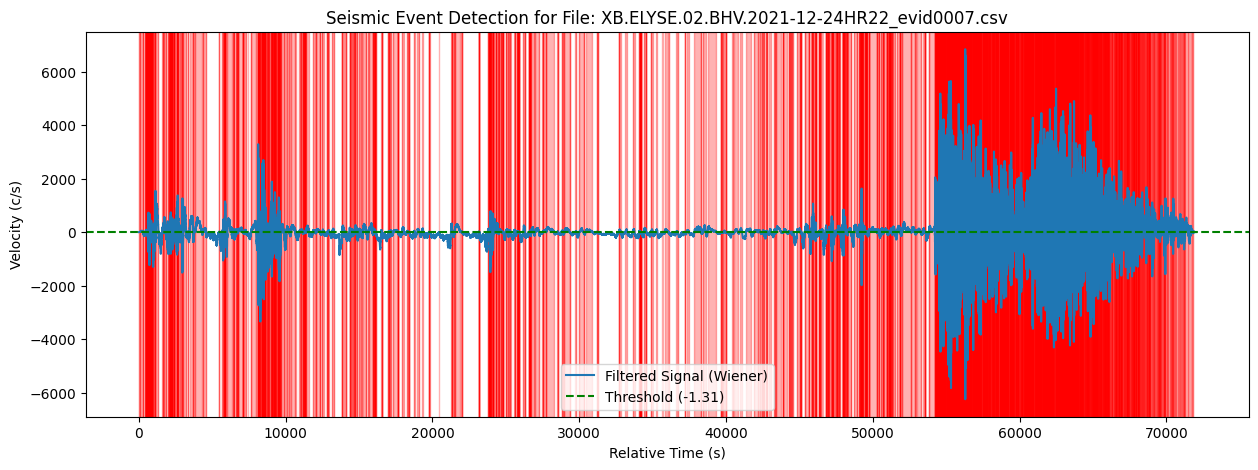

2874 seismic events detected in file ./data/mars/test/data/XB.ELYSE.02.BHV.2021-12-24HR22_evid0007.csv.
Event 1: Start - 0, End - 31, Duration - 1.55 seconds
Event 2: Start - 34, End - 35, Duration - 0.05 seconds
Event 3: Start - 48, End - 50, Duration - 0.10 seconds
Event 4: Start - 51, End - 52, Duration - 0.05 seconds
Event 5: Start - 53, End - 286, Duration - 11.65 seconds
Event 6: Start - 289, End - 291, Duration - 0.10 seconds
Event 7: Start - 294, End - 297, Duration - 0.15 seconds
Event 8: Start - 299, End - 300, Duration - 0.05 seconds
Event 9: Start - 417, End - 418, Duration - 0.05 seconds
Event 10: Start - 429, End - 434, Duration - 0.25 seconds
Event 11: Start - 435, End - 445, Duration - 0.50 seconds
Event 12: Start - 448, End - 450, Duration - 0.10 seconds
Event 13: Start - 452, End - 454, Duration - 0.10 seconds
Event 14: Start - 458, End - 459, Duration - 0.05 seconds
Event 15: Start - 462, End - 463, Duration - 0.05 seconds
Event 16: Start - 477, End - 480, Duration -

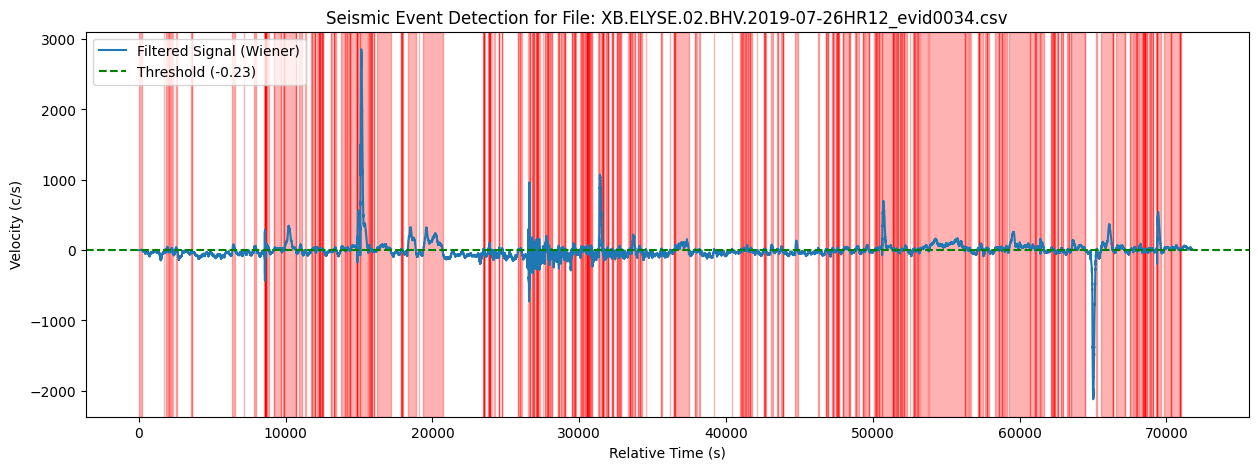

472 seismic events detected in file ./data/mars/test/data/XB.ELYSE.02.BHV.2019-07-26HR12_evid0034.csv.
Event 1: Start - 0, End - 208, Duration - 10.40 seconds
Event 2: Start - 1738, End - 1746, Duration - 0.40 seconds
Event 3: Start - 1860, End - 1988, Duration - 6.40 seconds
Event 4: Start - 2081, End - 2085, Duration - 0.20 seconds
Event 5: Start - 2086, End - 2087, Duration - 0.05 seconds
Event 6: Start - 2197, End - 2289, Duration - 4.60 seconds
Event 7: Start - 2314, End - 2315, Duration - 0.05 seconds
Event 8: Start - 2499, End - 2588, Duration - 4.45 seconds
Event 9: Start - 3580, End - 3588, Duration - 0.40 seconds
Event 10: Start - 3604, End - 3605, Duration - 0.05 seconds
Event 11: Start - 6376, End - 6567, Duration - 9.55 seconds
Event 12: Start - 7141, End - 7149, Duration - 0.40 seconds
Event 13: Start - 7836, End - 8010, Duration - 8.70 seconds
Event 14: Start - 8573, End - 8574, Duration - 0.05 seconds
Event 15: Start - 8582, End - 8583, Duration - 0.05 seconds
Event 16:

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import wiener

# Directory containing the CSV files
directory = './data/mars/test/data/'

# Function to analyze the signal in each file
def analyze_file(file_path):
    print(f"Processing file: {file_path}")
    
    # Reading data from the file
    data = pd.read_csv(file_path)

    # Using the 'velocity(c/s)' column as the signal
    signal = data['velocity(c/s)'].values
    time_rel = data['rel_time(sec)'].values  # Extracting relative time for duration calculation

    # Applying the Wiener filter to remove noise
    filtered_signal_wiener = wiener(signal, mysize=29)

    # Calculating the mean value of the signal and defining the threshold
    signal_mean = np.mean(filtered_signal_wiener)
    threshold = signal_mean * 2  # Threshold set to 2 times the mean value (can be adjusted)

    # Event detection based on the threshold
    def detect_events(signal, threshold, time_rel):
        events = []
        in_event = False
        start = 0

        for i in range(len(signal)):
            if signal[i] > threshold and not in_event:
                # Start of the event
                in_event = True
                start = i
            elif signal[i] <= threshold and in_event:
                # End of the event
                in_event = False
                end = i
                # Calculate event duration in seconds
                start_time = time_rel[start]
                end_time = time_rel[end]
                duration = end_time - start_time
                events.append((start, end, duration))

        return events

    events = detect_events(filtered_signal_wiener, threshold, time_rel)

    # Visualization of the detected events
    plt.figure(figsize=(15, 5))
    times = np.arange(len(signal))
    plt.plot(times, filtered_signal_wiener, label='Filtered Signal (Wiener)')
    plt.axhline(y=threshold, color='green', linestyle='--', label=f'Threshold ({threshold:.2f})')

    for start, end, duration in events:
        plt.axvspan(start, end, color='red', alpha=0.3)

    plt.title(f"Seismic Event Detection for File: {os.path.basename(file_path)}")
    plt.xlabel("Relative Time (s)")
    plt.ylabel("Velocity (c/s)")
    plt.legend()
    plt.show()

    # Output results
    print(f"{len(events)} seismic events detected in file {file_path}.")
    for i, (start, end, duration) in enumerate(events):
        print(f"Event {i+1}: Start - {start}, End - {end}, Duration - {duration:.2f} seconds")

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        analyze_file(file_path)